# Our Mission:
In this notebook we would be trying to understand the Waze user churn or retain dataset and also build models that would help us predict the possibilies from this dataset.

## Table of Contents

1. **Introduction**
   - Brief overview of the problem statement and dataset

2. **Data Preprocessing**
   - Importing necessary libraries (`numpy` and `pandas`)
   - Loading the dataset from a CSV file
   - Handling missing values in numerical columns

3. **Data Exploration**
   - Displaying the first rows of the dataset
   - Showing the shape of the dataset (number of rows and columns)
   - Displaying statistical summary of the dataset
   - Displaying random rows from the dataset
   - Displaying column names

4. **Data Transformation**
   - Label encoding the target variable ('label') for classification
   - One-hot encoding the categorical variable ('device')

5. **Feature Selection**
   - Selecting relevant features for modeling

6. **Model Selection and Training**
   - Splitting the data into training and testing sets
   - Initializing machine learning models (XGBoost, SVM, Random Forest, Logistic Regression, Gradient Boosting)
   - Training and evaluating the models
   - Comparing model performances based on accuracy and recall

7. **Model Evaluation**
   - Calculating and comparing recall scores for each model
   - Visualizing confusion matrices for model predictions

8. **Conclusion**
   - Summary of findings and best-performing model selection
   - Possible next steps or areas for improvement in the analysis


# These lines import the NumPy and Pandas libraries in Python:



In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

NumPy is used for numerical computing in Python, while Pandas is used for data manipulation and analysis, especially for working with structured data like CSV files.




# Reading and Understanding Data 


1. **Reading Data:**
   The code reads a dataset from a CSV file located at a specific path using Pandas' `read_csv` function.

2. **Displaying First Rows:**
   It prints the first 13 rows of the dataset to provide a quick view of the data's initial entries.

3. **Showing Dataset Shape:**
   The code prints the number of rows and columns in the dataset, giving an indication of its size.

4. **Displaying Dataset Summary:**
   It provides a summary of the dataset's statistical information, such as mean, standard deviation, minimum, maximum, etc.

5. **Displaying Random Rows:**
   The code prints 13 random rows from the dataset, offering a diverse sample of data entries.

6. **Displaying Column Names:**
   It prints the names of the columns in the dataset, indicating the different features or variables present in the data.

In [11]:
dataset = pd.read_csv("/kaggle/input/waze-dataset-to-predict-user-churn/waze_dataset.csv")

print(dataset.head(13))

print(dataset.shape)

print(dataset.describe())

print(dataset.sample(13))

print(dataset.columns )

# print(dataset.head(13))

    ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0    0  retained       283     226      296.748273                     2276   
1    1  retained       133     107      326.896596                     1225   
2    2  retained       114      95      135.522926                     2651   
3    3  retained        49      40       67.589221                       15   
4    4  retained        84      68      168.247020                     1562   
5    5  retained       113     103      279.544437                     2637   
6    6  retained         3       2      236.725314                      360   
7    7  retained        39      35      176.072845                     2999   
8    8  retained        57      46      183.532018                      424   
9    9   churned        84      68      244.802115                     2997   
10  10  retained        23      20      117.225772                     1946   
11  11  retained       125     100      357.179031  

This code below snippet performs the following operations:

1. **Selecting Numerical Columns:**
   It selects columns in the dataset that have data types 'float64' or 'int64'. These columns typically contain numerical data.

2. **Filling Missing Values with Mean:**
   For the selected numerical columns, it fills any missing (NaN) values with the mean of the respective column. This is a common technique to handle missing data in numerical columns, ensuring that the dataset remains complete for further analysis or modeling.

In [12]:
# Handle null values for numerical columns by filling with mean
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].mean())


This code below utilizes Matplotlib and Seaborn libraries for data visualization. It does the following:

1. **Selecting Columns:**
   It selects specific columns from the dataset for visualization. These columns are `'sessions'`, `'drives'`, `'total_sessions'`, `'n_days_after_onboarding'`, `'total_navigations_fav1'`, `'total_navigations_fav2'`, `'driven_km_drives'`, `'duration_minutes_drives'`, `'activity_days'`, and `'driving_days'`.

2. **Plotting Numerical Columns:**
   It creates bar plots for each selected numerical column against the `'label'` column. Each plot shows how the selected numerical feature varies concerning the target variable `'label'` (which is likely a classification label, e.g., 'churn' or 'no churn'). This visualization helps understand the relationship between these features and the target variable.

3. **Plotting Categorical Column:**
   It creates a count plot for the categorical column `'device'` against the `'label'` column. The count plot shows the distribution of different devices concerning the target variable. It helps to analyze how different devices relate to the target variable.

Note: The plots are displayed one by one due to the use of `plt.show()`, meaning each plot appears individually after the execution of the respective code block.

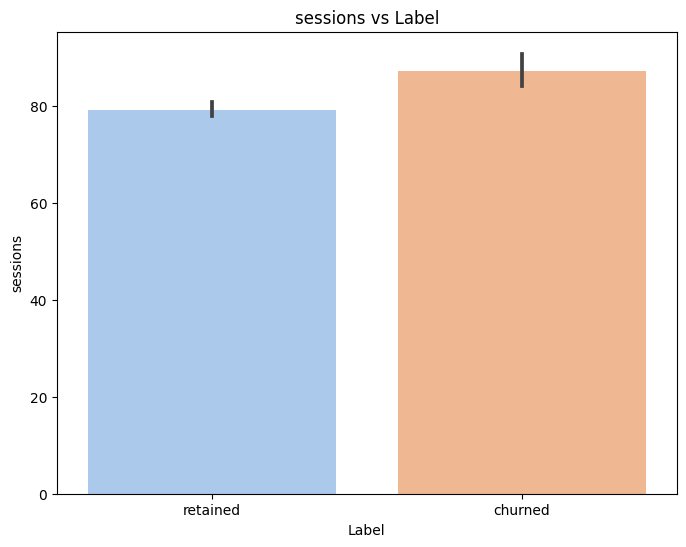

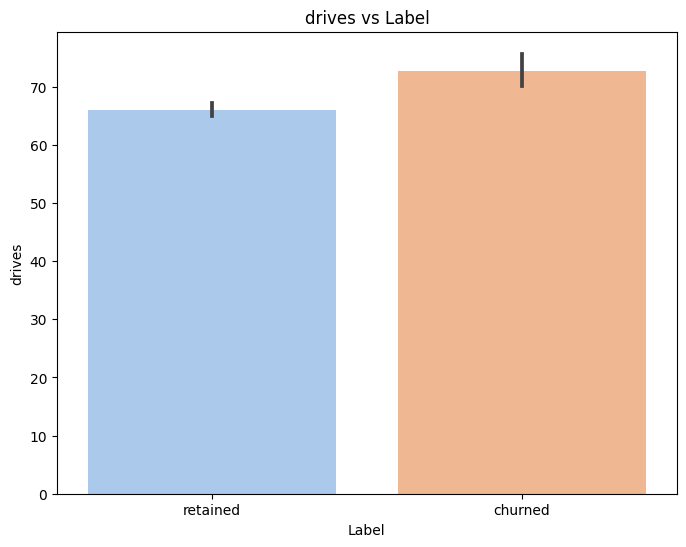

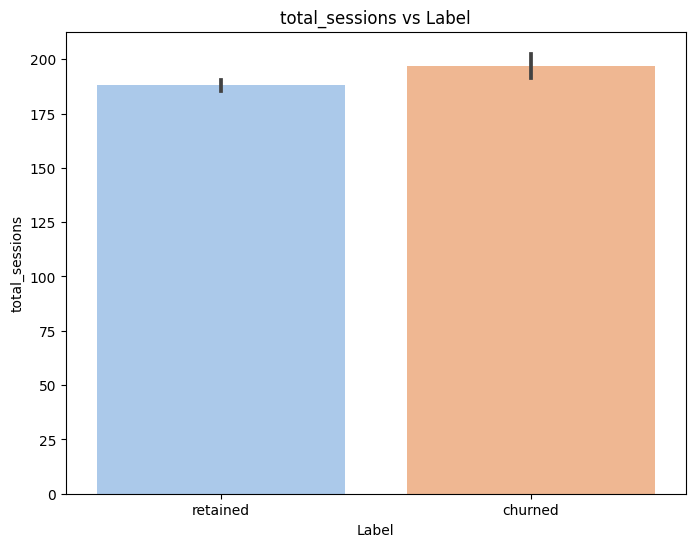

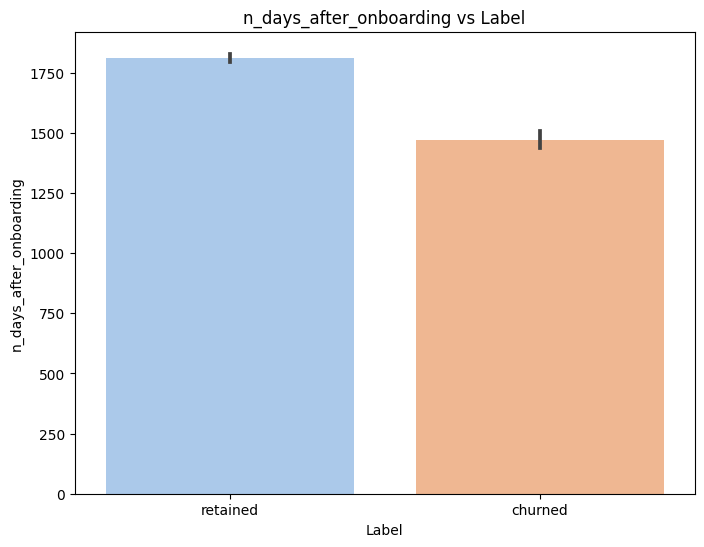

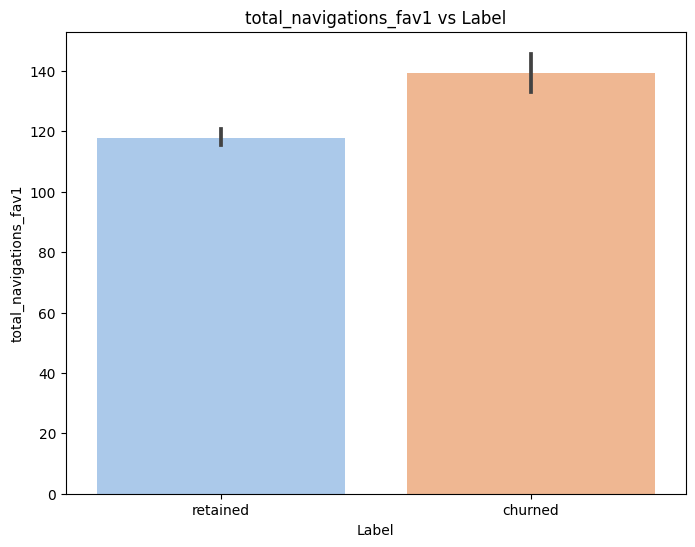

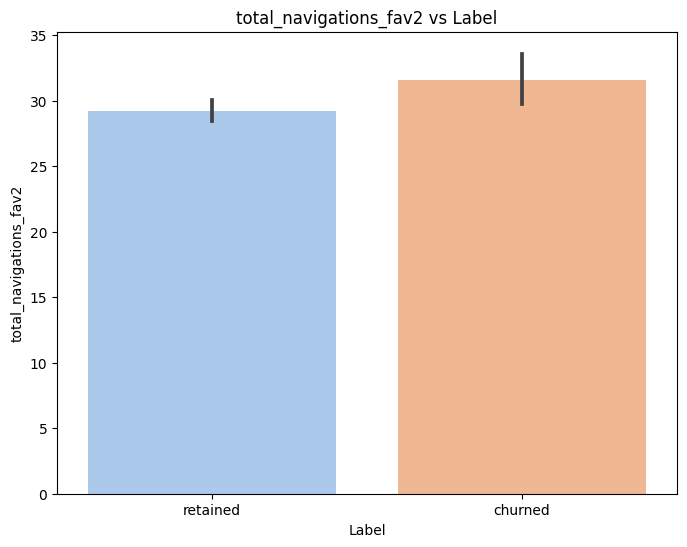

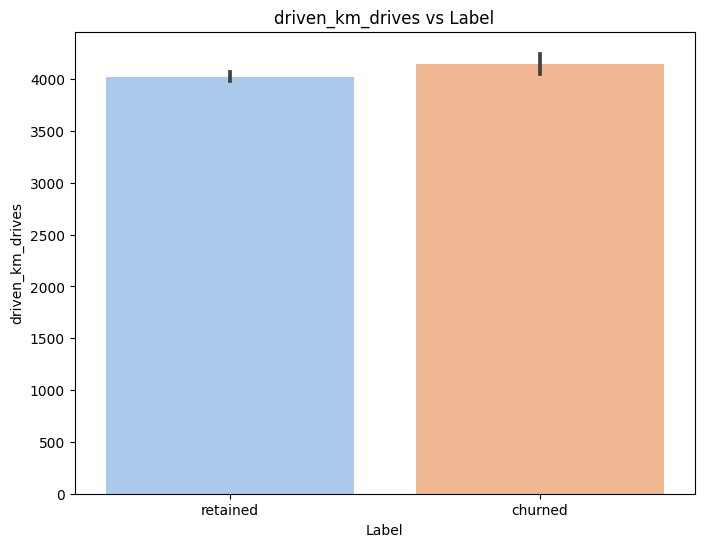

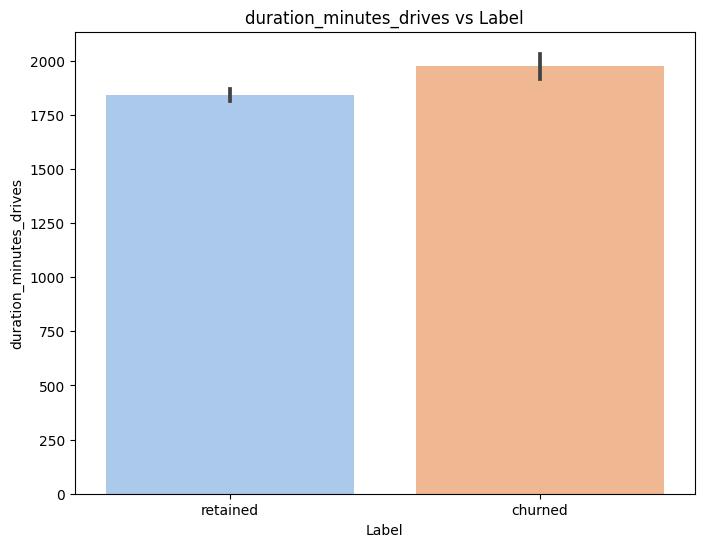

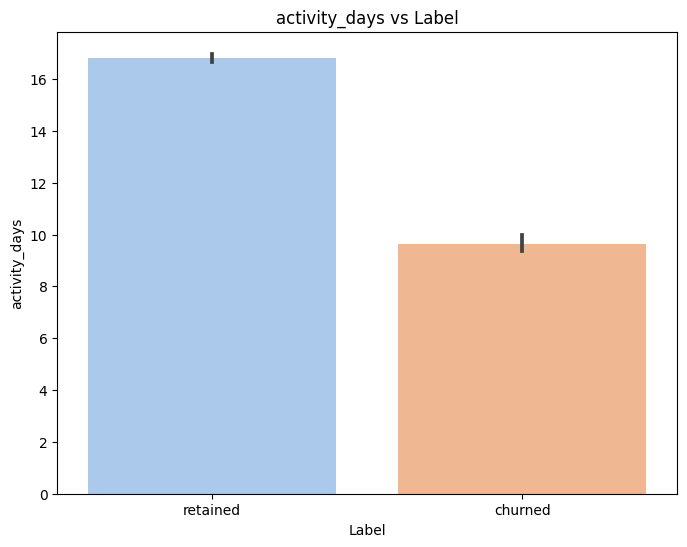

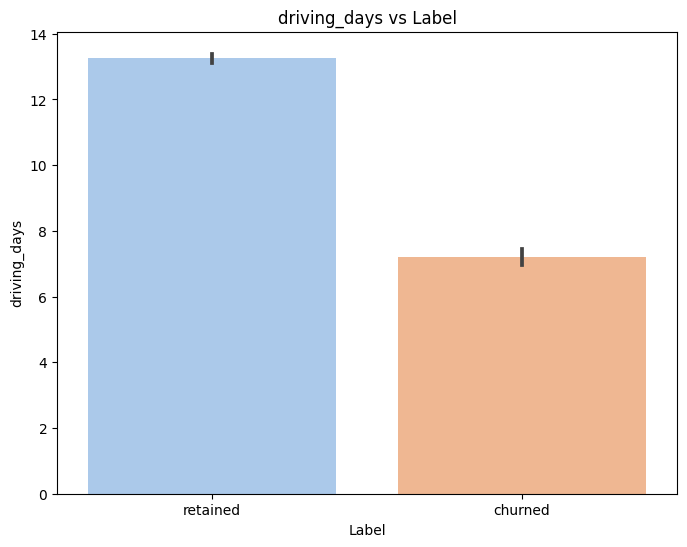

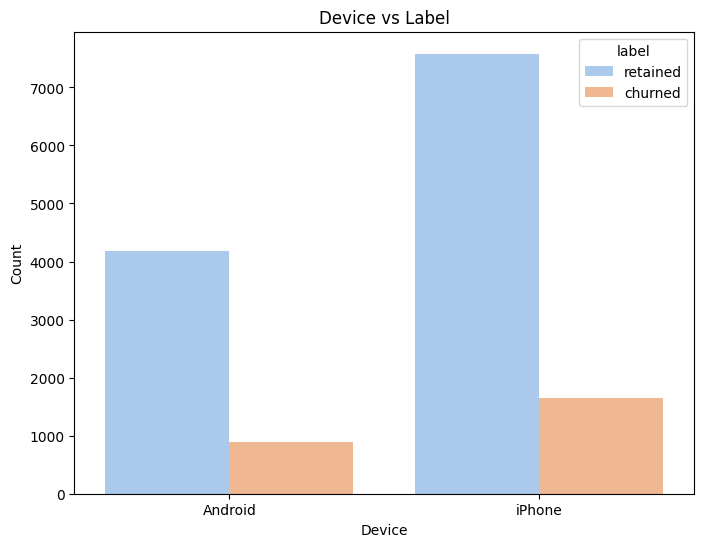

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd


# Select columns to visualize (excluding 'ID' and 'device' columns)
columns_to_visualize = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 
                        'total_navigations_fav1', 'total_navigations_fav2', 
                        'driven_km_drives', 'duration_minutes_drives', 
                        'activity_days', 'driving_days']

# Plot numerical columns against 'label'
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='label', y=column, data=dataset, palette='pastel')
    plt.title(f'{column} vs Label')
    plt.xlabel('Label')
    plt.ylabel(column)
    plt.show()

# We are doing this for the device column because the data in that column is not numeric but categorical
# Plot categorical column 'device' against 'label'
plt.figure(figsize=(8, 6))
sns.countplot(x='device', hue='label', data=dataset, palette='pastel')
plt.title('Device vs Label')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()


# This code below performs the following tasks:

1. **Label Encoding:**
   It uses the `LabelEncoder` from scikit-learn to convert the `'label'` column in the dataset from categorical values (likely strings, such as 'churn' or 'no churn') into numerical values. This transformation is essential for many machine learning algorithms that require numerical inputs.

2. **One-Hot Encoding:**
   It applies one-hot encoding to the `'device'` column. One-hot encoding converts categorical variables into a binary matrix, where each category becomes a binary column (0 or 1). This transformation allows machine learning algorithms to work with categorical data effectively.

3. **Selecting Features and Labels:**
   It separates the features (X) and labels (y) for the machine learning model. The features (`X`) consist of all columns except `'ID'`, `'label'`, and `'label_encoded'`, while the labels (`y`) are the values in the `'label_encoded'` column. This prepares the data for training a machine learning model where `X` represents the input features and `y` represents the corresponding labels.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Convert 'label' column to numerical using label encoding
label_encoder = LabelEncoder()
dataset['label_encoded'] = label_encoder.fit_transform(dataset['label'])

# One-hot encode 'device' column
dataset = pd.get_dummies(dataset, columns=['device'], prefix=['device'])

# Select X (features) and y (labels)
X = dataset.drop(columns=['ID', 'label', 'label_encoded'])
y = dataset['label_encoded']



The commented-out code in your snippet performs the following tasks:

1. **Splitting Data:**
   It splits the dataset into training and testing sets using the `train_test_split` function from scikit-learn. 60% of the data is used for training (`X_train`, `y_train`), and 40% is used for testing (`X_test`, `y_test`). The `random_state=42` parameter ensures reproducibility.

2. **Initializing Models:**
   It initializes machine learning models for classification tasks. The models include XGBoost (`'XGB'`), Support Vector Machine (`'SVM'`), Random Forest (`'RF'`), Logistic Regression (`'LR'`), and Gradient Boosting (`'GB'`).

3. **Training and Evaluating Models (Currently Commented Out):**
   There are commented lines of code inside a loop that iterate through each model, train it on the training data, make predictions on the test data, calculate accuracy using `accuracy_score`, and store the results in the `results` dictionary.

4. **Printing Model Comparison (Currently Commented Out):**
   After evaluating all models, it prints the name of the best-performing model along with its accuracy score.



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Assuming your features are stored in X and labels in y

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize models
models = {
    'XGB': xgb.XGBClassifier(),
    'SVM': SVC(),
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier()
}

# print(y_train.unique)
# Train and evaluate models
results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f'{name} Accuracy: {accuracy:.2f}')

# # Print model comparison
# best_model = max(results, key=results.get)
# print(f'Best Model: {best_model} with Accuracy: {results[best_model]:.2f}')


# The code below:
This code below calculates and compares the recall scores (sensitivity) of different machine learning models for a classification task. It also computes and displays the confusion matrices for each model. Here's a breakdown of what it does:

1. **Calculating Recall and Confusion Matrix:**
   - It iterates through the models in the `models` dictionary.
   - For each model, it trains the model on the training data (`X_train`, `y_train`) and makes predictions on the test data (`X_test`).
   - The `recall_score` function computes the recall score, which is the ratio of true positive predictions to the total actual positive instances. The `'weighted'` average is used here.
   - The `confusion_matrix` function creates a confusion matrix, showing the counts of true positive, true negative, false positive, and false negative predictions.

2. **Printing Recall Scores and Confusion Matrices:**
   - For each model, it prints the recall score and the confusion matrix.
   - It also plots the confusion matrix using a heatmap, where actual values are on the y-axis and predicted values are on the x-axis.

3. **Comparing Models Based on Recall:**
   - After evaluating all models, it prints the name of the best-performing model based on recall along with its recall score.

This code provides a comprehensive evaluation of the models' performance, emphasizing their ability to correctly identify positive instances (sensitivity/recall) and visualizing their predictions through confusion matrices.

XGB Recall: 0.78
Confusion Matrix for XGB:
[[ 135  862    2]
 [ 201 4540    4]
 [  18  238    0]]


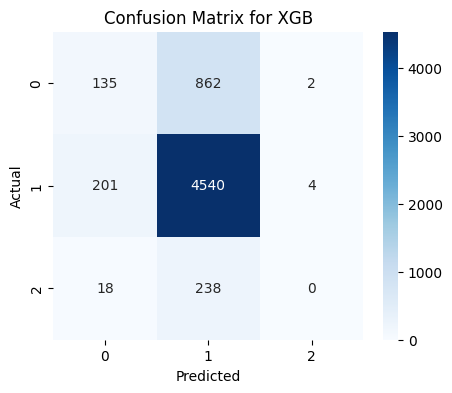

SVM Recall: 0.79
Confusion Matrix for SVM:
[[   0  999    0]
 [   0 4745    0]
 [   0  256    0]]


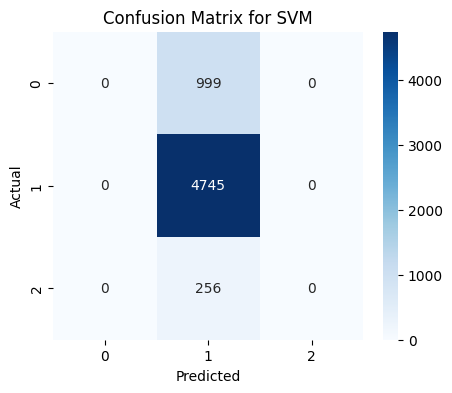

RF Recall: 0.79
Confusion Matrix for RF:
[[ 124  875    0]
 [ 142 4603    0]
 [   8  248    0]]


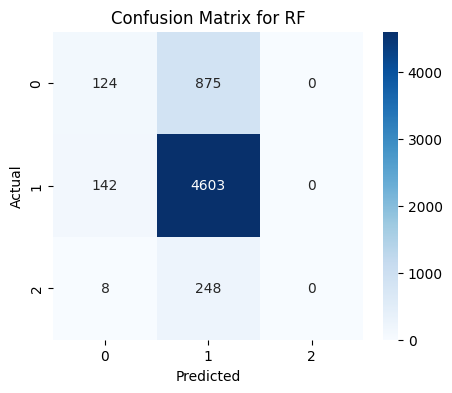

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Recall: 0.79
Confusion Matrix for LR:
[[  56  943    0]
 [  42 4703    0]
 [   6  250    0]]


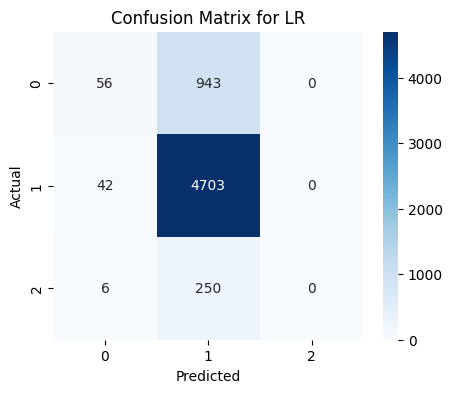

GB Recall: 0.79
Confusion Matrix for GB:
[[ 107  892    0]
 [  91 4651    3]
 [   9  247    0]]


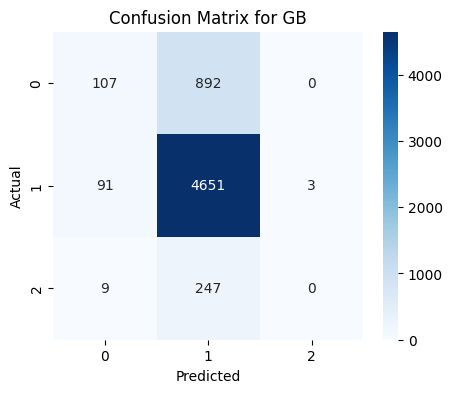

Best Model: LR with Recall: 0.79


In [21]:
from sklearn.metrics import recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming models is a dictionary containing your machine learning models

results = {}  # Dictionary to store results

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate recall with 'weighted' average
    cm = confusion_matrix(y_test, y_pred)  # Get confusion matrix
    results[name] = recall
    print(f'{name} Recall: {recall:.2f}')
    print(f'Confusion Matrix for {name}:\n{cm}')

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Print model comparison based on recall
best_model = max(results, key=results.get)
print(f'Best Model: {best_model} with Recall: {results[best_model]:.2f}')


# Conclusion

The consistent recall scores between 0.78 and 0.79 across various machine learning models in the notebook indicate that these models are performing fairly well in capturing the true positive cases, especially considering that the scores are quite close. However, the slight difference in recall, even within this narrow range, is still meaningful. 

In the context of classification models, recall (also known as sensitivity or true positive rate) is the ability of a model to identify all relevant instances in a dataset. A higher recall means the model is better at identifying positive cases, which can be crucial in certain applications such as medical diagnosis or fraud detection, where missing a positive case can have significant consequences.

In this scenario:

1. **Logistic Regression:**
   - It's worth noting that logistic regression achieved the highest recall among the models. This means that it had a better ability to identify positive cases compared to other models. It could be due to the inherent properties of the dataset that make logistic regression well-suited for capturing the patterns within the positive class.

2. **Other Models (Random Forest, SVM, XGBoost, Gradient Boosting):**
   - These models performed slightly lower in terms of recall, but the difference is not substantial. The similarity in their recall scores suggests that they are comparable in their ability to identify positive cases. 



In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'XGB': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RF': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'LR': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'GB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
}

# Train and tune models
best_models = {}
for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'Best {name} Parameters: {grid_search.best_params_}')

# Evaluate tuned models
results_tuned = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_tuned[name] = accuracy
    print(f'Tuned {name} Accuracy: {accuracy:.2f}')

# Print tuned model comparison
best_model_tuned = max(results_tuned, key=results_tuned.get)
print(f'Best Tuned Model: {best_model_tuned} with Accuracy: {results_tuned[best_model_tuned]:.2f}')
"""